In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from data_generation import game_generation, self_play
from deepmctsmodel import DeepMctsModel
from loss import Loss
from train import training_loop

In [2]:
mcts_model = DeepMctsModel()
optim = torch.optim.SGD(mcts_model.parameters(), nesterov=True, lr=1e-4, dampening=0.0, momentum=0.9)
lambda_l2 = 1e-4
loss_fn = Loss(1e-4)
epochs = 10
batch_size = 32
shuffle = True
game_count = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/jgale/miniconda3/envs/my_push/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
dataset = game_generation(game_count, as_list=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

Generating games: 100%|██████████| 100/100 [00:31<00:00,  3.13it/s]


In [4]:
X, y_truth, y_value = next(iter(dataloader))
pred_value, pred_truth = mcts_model(X)

In [5]:
losses = training_loop(mcts_model, dataloader, optim, loss_fn, epochs, device)

  0%|          | 0/10 [00:00<?, ?it/s]/home/jgale/my_push/marl/chinesecheckers/train.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X, y_truth, y_value = X.to(device), y_truth.to(device), torch.tensor(y_value, dtype=torch.float32, device=device)
/home/jgale/miniconda3/envs/my_push/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/jgale/miniconda3/envs/my_push/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead 

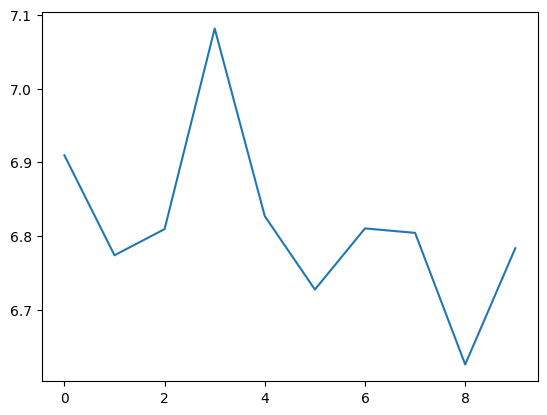

In [6]:
plt.plot(losses, label="Training Losses")
plt.show()

In [7]:
# torch.save(mcts_model.state_dict(), f"./models/heuristic-trained-mcts-model-v1.pt")
# torch.save(losses, "./models/heuristic-trained-mcts-model-v1-loss.array")